<a href="https://colab.research.google.com/github/syalam1998/hds5210-2023/blob/main/week12/week12_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')
condemnations.shape

<ipython-input-1-c50abd9a399b>:5: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')


(32586, 40)

In [2]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate']) # converted inspect date column to date time format

In [3]:
# Filter data from year 1986 to 2014
condemnations = condemnations[(condemnations['InspectDate'].dt.year >= 1986) & (condemnations['InspectDate'].dt.year <= 2014)]

In [4]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [5]:
# Pivot table named by_year
by_year = condemnations.pivot_table(
    index=condemnations['InspectDate'].dt.year,
    columns='Status',
    values='AcctNum',
    aggfunc=np.ma.count
)

In [6]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectDate'>

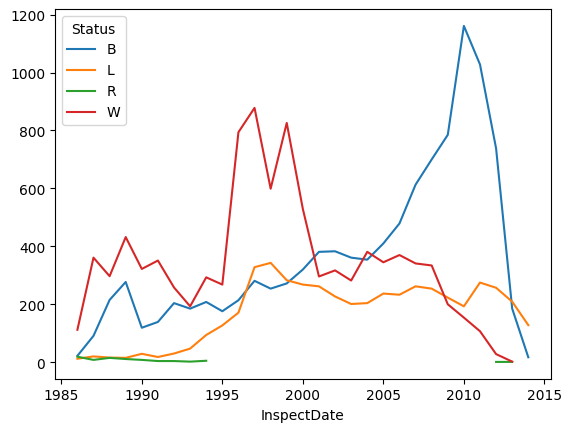

In [7]:
%matplotlib inline
by_year.plot()

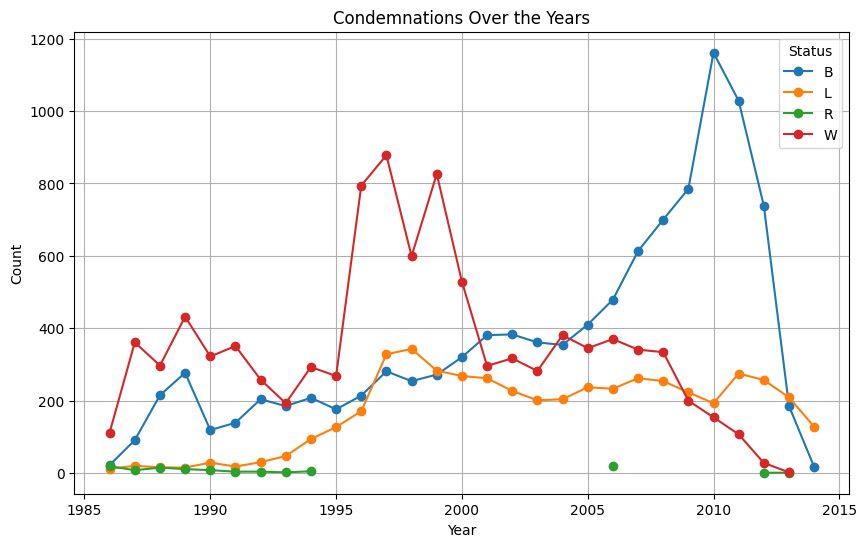

In [8]:
import matplotlib.pyplot as plt

by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Condemnations Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status')
plt.grid(True)
plt.show()

This a multi series line chart with year on X-axis and the count on Y-axis. It shows the count of condemnations over the years from 1986 to 2014 which has 4 line plots showing fro different statuses like B, L, R, W. There are very less number of condemnations near to zero for status R. The count did not cross 400 for status L where as for status B and W we can see spike between 1995 and 2000 for status B and a spike at 2010 for status B. Finally for all the statusses, the counts came near to zero at 2014.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [9]:
import pandas as pd

meetings = pd.read_csv("https://hds5210-data.s3.amazonaws.com/meetings.csv")

# 1. Created a new column called startDate that contains just the day part of the startTime column in the data
meetings['startDate'] = meetings['startTime'].str[0:10]

# 2. Created a new column for pivot table
meetings.loc[meetings['startDate'].between('2020-02-17', '2020-02-28'), 'Label'] = 'BEFORE'
meetings.loc[meetings['startDate'].between('2020-03-16', '2020-03-27'), 'Label'] = 'DURING'

In [17]:
# 3. Created a pivot table which contains username as index, BEFORE, AFTER and percent change
summary = pd.pivot_table(meetings, index='userName', columns='Label', values='meetingId', aggfunc='count', fill_value=0)
summary['pctChange'] = ((summary['DURING'] - summary['BEFORE']) / summary['BEFORE'])

In [18]:
summary

Label,BEFORE,DURING,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000
eric.keeney,15,27,0.800000
eric.rodman,4,12,2.000000
jeff.hatfield.amitechsolutions,13,26,1.000000
jennifer.patton.amitechs,5,7,0.400000


---

In [19]:
assert(len(summary) == 22)

In [20]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
